In [1]:
import torch

def check_cuda_availability():
    if torch.cuda.is_available():
        print("CUDA is available!")
        print(f"Device count: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"Device {i} name: {torch.cuda.get_device_name(i)}")
    else:
        print("CUDA is not available.")

check_cuda_availability()

CUDA is available!
Device count: 1
Device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
from ultralytics import YOLO

In [3]:
#result = torch.load("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/yolov8n.pt")
result = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/47_(10)_logos_head_17logosbase_L_3/train/weights/best.pt")
result.names
result.model.eval()
torch.save({'model': result.model}, "corrected_best.pt")

In [4]:
#result = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/yolov8n.pt")
result = torch.load("/home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/corrected_best.pt")

In [5]:
#result['model']
result['model'].names


{0: 'Joma',
 1: 'Stahlwerk',
 2: 'Tiktok',
 3: 'tipico',
 4: 'BetWay',
 5: 'SAP',
 6: 'Sparkasse',
 7: 'Volkswagen',
 8: 'Umbro',
 9: 'PENNY'}

In [6]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/corrected_best.pt", 
    conf_threshold=0.2, 
    method = "GradCAMPlusPlus", 
    layer=[10, 12, 14, 16, 18, -3],
    #backward_type="all",
    ratio=0.02,
    show_box=True,
    #renormalize=False,
        
)



imagelist = model(
    img_path="/home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/images_heatmap", 
    )


Model summary: 365 layers, 43,637,550 parameters, 0 gradients, 165.4 GFLOPs
'int' object has no attribute 'backward'
'int' object has no attribute 'backward'


In [3]:
model = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/corrected_best.pt")
model.predict(source="/home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/images_heatmap", save = True)


image 1/66 /home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/images_heatmap/60dd653eda90121a7746c65e_1000.jpg: 640x384 1 Umbro, 39.3ms
image 2/66 /home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/images_heatmap/60dd653eda90121a7746c65e_1001.jpg: 640x384 1 Umbro, 13.4ms
image 3/66 /home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/images_heatmap/60dd653eda90121a7746c65e_1216.jpg: 640x384 1 Joma, 13.1ms
image 4/66 /home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/images_heatmap/60dd653eda90121a7746c65e_1219.jpg: 640x384 (no detections), 13.1ms
image 5/66 /home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/images_heatmap/60dd653eda90121a7746c65e_1411.jpg: 640x384 3 Jomas, 7 SAPs, 13.0ms
image 6/66 /home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Joma', 1: 'Stahlwerk', 2: 'Tiktok', 3: 'tipico', 4: 'BetWay', 5: 'SAP', 6: 'Sparkasse', 7: 'Volkswagen', 8: 'Umbro', 9: 'PENNY'}
 obb: None
 orig_img: array([[[229, 255, 249],
         [229, 255, 249],
         [227, 255, 249],
         ...,
         [ 77, 145, 122],
         [ 77, 145, 122],
         [ 77, 145, 122]],
 
        [[229, 255, 249],
         [229, 255, 249],
         [227, 255, 249],
         ...,
         [ 77, 145, 122],
         [ 77, 145, 122],
         [ 77, 145, 122]],
 
        [[230, 255, 251],
         [230, 255, 251],
         [228, 255, 251],
         ...,
         [ 77, 145, 122],
         [ 77, 145, 122],
         [ 76, 144, 121]],
 
        ...,
 
        [[157, 184, 240],
         [157, 184, 240],
         [155, 185, 240],
         ...,
         [122, 153, 198],
         [129, 160, 205],
         [133, 164,

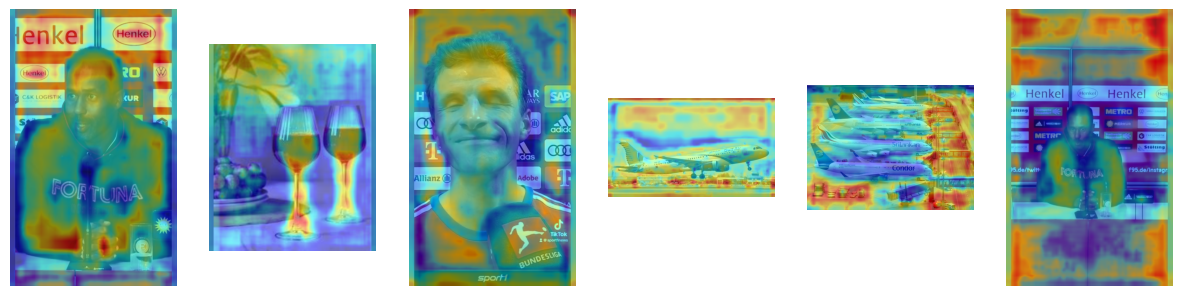

In [16]:

display_images(imagelist)

In [17]:
imagelist

[<PIL.Image.Image image mode=RGB size=384x640>,
 <PIL.Image.Image image mode=RGB size=512x640>,
 <PIL.Image.Image image mode=RGB size=384x640>,
 <PIL.Image.Image image mode=RGB size=640x384>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=384x640>]

In [7]:
import os

# Define the directory where you want to save the images
save_directory = "/home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/result_heatmap_GradCAMplusplus"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save each image from the list with a unique name
for i, img in enumerate(imagelist):
    img_path = os.path.join(save_directory, f"image_{i+1}.png")  # Save as PNG, change format if needed
    try:
        img.save(img_path)  # Attempt to save the image
    except Exception as e:
        print(f"Error saving image {i+1}: {e}")

print(f"Images saved in {save_directory} folder.")


Error saving image 41: 'NoneType' object has no attribute 'save'
Error saving image 57: 'NoneType' object has no attribute 'save'
Images saved in /home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/result_heatmap_GradCAMplusplus folder.
